In [1]:
import sys 
sys.path.append("../..") # The position of sge library
from sge import *
import time
import matplotlib.pyplot as plt

In [2]:
# Set the name of job and number of processes
script_code = job.mpi_job_script_code('LAMMPS','8') 
# Set the necessary modules for the LAMMPS example
script_code = job.load_module('compilers/intel/2018/update3',script_code)
script_code = job.load_module('mpi/intel/2018/update3/intel',script_code)
script_code = job.load_module('lammps/7Aug19/basic/intel-2018',script_code)
# Create code to run the simulation
run_code = 'gerun  lmp_default -in in.rhodo.scaled -log log.lammps.'
script_code = job.add_working_code(script_code,run_code)
print(script_code)

#!/bin/bash -l
#$ -l h_rt=0:10:0
#$ -l mem=1G
#$ -l tmpfs=15G
#$ -N LAMMPS
#$ -cwd 

#$ -pe mpi 8
module load compilers/intel/2018/update3
module load mpi/intel/2018/update3/intel
module load lammps/7Aug19/basic/intel-2018
gerun  lmp_default -in in.rhodo.scaled -log log.lammps.



In [3]:
script = job.generate_script('LAMMPS',script_code) # Generate the script file named 'LAMMPS.sh' and put the script code in it

In [4]:
id = job.submit_job('LAMMPS.sh') # Remember the job id

In [5]:
job.job_status(id)

'The job 9242776 is queuing and waiting.'

In [6]:
while(job.job_status(id)!='The job ' + id + ' does not exist.'):
    time.sleep(30) # Wait 30 seconds
print('The job ' + id + ' has finished.')

The job 9242776 has finished.


In [7]:
print(job.setup_output('LAMMPS',id)) # Setup script output

/var/opt/sge/node-j00a-001/active_jobs/9242776.1/pe_hostfile
node-j00a-001
node-j00a-001
node-j00a-001
node-j00a-001
node-j00a-001
node-j00a-001
node-j00a-001
node-j00a-001



In [8]:
print(job.setup_error('LAMMPS',id)) # Setup script error

In [9]:
print(job.return_output('LAMMPS',id)) # Job output

LAMMPS (7 Aug 2019)
  using 1 OpenMP thread(s) per MPI task
Reading data file ...
  orthogonal box = (-27.5 -38.5 -36.3646) to (27.5 38.5 36.3615)
  2 by 2 by 2 MPI processor grid
  reading atoms ...
  32000 atoms
  reading velocities ...
  32000 velocities
  scanning bonds ...
  4 = max bonds/atom
  scanning angles ...
  8 = max angles/atom
  scanning dihedrals ...
  18 = max dihedrals/atom
  scanning impropers ...
  2 = max impropers/atom
  reading bonds ...
  27723 bonds
  reading angles ...
  40467 angles
  reading dihedrals ...
  56829 dihedrals
  reading impropers ...
  1034 impropers
Finding 1-2 1-3 1-4 neighbors ...
  special bond factors lj:   0          0          0         
  special bond factors coul: 0          0          0         
  4 = max # of 1-2 neighbors
  12 = max # of 1-3 neighbors
  24 = max # of 1-4 neighbors
  26 = max # of special neighbors
  special bonds CPU = 0.138807 secs
  read_data CPU = 1.26628 secs
Replicating atoms ...
  orthogonal box = (-27.5 -38.5 

In [10]:
print(job.return_error('LAMMPS',id)) # Job error. Below is the default return error message which doesn't mean there exists error.

GERun: 
GERun: Note: Lines like this one prefixed with "GERun:" are for debugging
GERun:       purposes only and you do not need to report them to rc-support
GERun:       unless your job fails for other reasons.
GERun: 
GERun: 
GERun: Grid Engine parallel launcher abstraction layer version iv (public)
GERun: Dr Owain Kenway, RCAS, RITS, ISD, UCL, 7th of February, 2018
GERun: 
GERun: For licensing terms, see LICENSE.txt
GERun: 
GERun: Using environment: intel
GERun: Running on 8 slots:
GERun:     8 MPI tasks
GERun:     1 threads per task
GERun: TMPDIR=/tmpdir/job/9242776.undefined
GERun: 
GERun: Contents of machinefile:
GERun: node-j00a-001
GERun: node-j00a-001
GERun: node-j00a-001
GERun: node-j00a-001
GERun: node-j00a-001
GERun: node-j00a-001
GERun: node-j00a-001
GERun: node-j00a-001
GERun: 
GERun: GErun command being run:
GERun:  mpirun --rsh=ssh -machinefile /tmpdir/job/9242776.undefined/machines.unique -np 8 -rr lmp_default -in in.rhodo.scaled -log log.lammps.



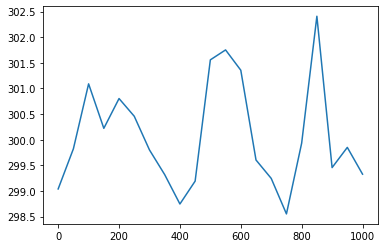

In [11]:
import lammps_logfile

log = lammps_logfile.File("log.lammps.")

x = log.get("Step")
y = log.get("Temp")

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()
